In [1]:

import networkx as nx
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image
import ipywidgets as widgets
from ipywidgets import interact
from google_drive_downloader import GoogleDriveDownloader as gdd
import plotly.graph_objects as go

descargar imagen

In [2]:
# URL of the image (replace with the actual URL of your image)
image_url = "https://drive.google.com/file/d/1iV8F7AyQ2HRf-8y1T-agCBt_BlIp3n8o/view"
# Extract the file ID from the URL
file_id = image_url.split('/')[-2]

# Download the image to a local file
gdd.download_file_from_google_drive(file_id=file_id,
                                    dest_path='./map.png',
                                    unzip=False)

# Open the downloaded image using PIL
map_image = Image.open('./map.png')

# Get image dimensions
img_width, img_height = map_image.size

## **mostrar mapa solo**


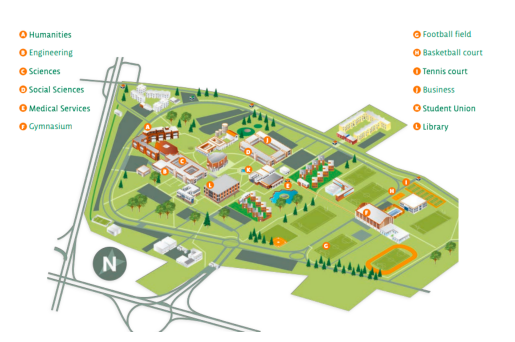

In [3]:
# Display the map as background
plt.imshow(map_image)
plt.axis('off')  # Hide axes
plt.show()

# **mapa con vertices**

In [4]:
regions = {
    "Humanidades" : (240,205),
    "Ingenierias" : (270,285),
    "Ciencias" : (300,265),
    "Sociales" : (420,250),
    "Servicios Medicos" : (485,310),
    "Gimnasio" : (625,355),
    "Cancha de futbol" : (555,415),
    "Cancha de basket" : (670,320),
    "Cancha de tenis" : (695,305),
    "Negocios" : (450,230),
    "Biblioteca": (350, 310),
    "Cafetería": (420, 280),
}
# Get image dimensions
img_width, img_height = map_image.size

# Create a figure with the map as a background image
fig = go.Figure()

# Add image to the figure
fig.add_layout_image(
    dict(
        source=map_image,
        x=0,
        y=1,
        xref="paper",
        yref="paper",
        sizex=1,
        sizey=1,
        sizing="stretch",
        opacity=1,
        layer="below"
    )
)

# Add clickable dots for the regions with adjusted coordinates
for name, (x, y) in regions.items():
    # Adjust coordinates to match image size in paper coordinates
    adjusted_x = x / img_width  # Normalize x to paper coordinates
    adjusted_y = 1 - (y / img_height)  # Normalize y to paper coordinates (flip y-axis)

    fig.add_trace(go.Scatter(
        x=[adjusted_x], y=[adjusted_y],
        mode="markers+text",
        text=[name],
        textposition="top center",
        marker=dict(size=10, color="red"),
        name=name,
        hoverinfo="text"
    ))

# Update layout to make the map interactive with squared aspect ratio
fig.update_layout(
    title="Mapa de vertices UDLAP",
    xaxis=dict(showgrid=False, zeroline=False, range=[0, 1]),
    yaxis=dict(showgrid=False, zeroline=False, range=[0, 1]),
    showlegend=False,
    hovermode="closest",
    # Set the aspect ratio to make it square-shaped
    autosize=True,
    height=600,  # Adjust this for desired height
    width=800,   # Adjust this for desired width
)

# Show the interactive map
fig.show()

# **conexiones de los vertices**

In [5]:
# Define regions and their coordinates
# Define regions and their coordinates
regions = {
    "Humanidades": (240, 205),
    "Ingenierias": (270, 285),
    "Ciencias": (300, 265),
    "Sociales": (420, 250),
    "Servicios Medicos": (485, 310),
    "Gimnasio": (625, 355),
    "Cancha de futbol": (555, 415),
    "Cancha de basket": (670, 320),
    "Cancha de tenis": (695, 305),
    "Negocios": (450, 230),
    "Biblioteca": (350, 310),
    "Cafetería": (420, 280),
}

# Conexiones explícitas entre regiones (sin pesos, solo las conexiones)
connections = [
    ("Humanidades", "Ciencias"),
    ("Ciencias", "Ingenierias"),
    ("Ciencias", "Biblioteca"),
    ("Ingenierias", "Biblioteca"),
    ("Biblioteca", "Cafetería"),
    ("Ciencias", "Cafetería"),
    ("Ciencias", "Sociales"),
    ("Biblioteca", "Sociales"),
    ("Cafetería", "Sociales"),
    ("Sociales", "Negocios"),
    ("Cafetería", "Servicios Medicos"),
    ("Gimnasio", "Servicios Medicos"),
    ("Negocios", "Servicios Medicos"),
    ("Gimnasio", "Cafetería"),
    ("Gimnasio", "Cancha de futbol"),
    ("Gimnasio", "Cancha de basket"),
    ("Cancha de basket", "Cancha de tenis"),
]

# Calcular dinámicamente los pesos solo para las conexiones definidas
import math

edges_dynamic = []
for start, end in connections:
    coord1, coord2 = regions[start], regions[end]
    # Calcular la distancia euclidiana entre los nodos conectados
    distance = math.sqrt((coord2[0] - coord1[0]) ** 2 + (coord2[1] - coord1[1]) ** 2)
    edges_dynamic.append((start, end, distance))
    print(f"Conexión: {start} -> {end}, Peso (distancia): {distance:.2f}")


# Obtener las dimensiones de la imagen
img_width, img_height = map_image.size

# Crear una figura con el mapa como fondo
fig = go.Figure()

# Agregar la imagen al fondo
fig.add_layout_image(
    dict(
        source=map_image,
        x=0,
        y=1,
        xref="paper",
        yref="paper",
        sizex=1,
        sizey=1,
        sizing="stretch",
        opacity=1,
        layer="below"
    )
)

# Agregar puntos interactivos para las regiones
for name, (x, y) in regions.items():
    adjusted_x = x / img_width  # Normalizar x a coordenadas de papel
    adjusted_y = 1 - (y / img_height)  # Normalizar y (invertir eje y)

    fig.add_trace(go.Scatter(
        x=[adjusted_x], y=[adjusted_y],
        mode="markers+text",
        text=[name],
        textposition="top center",
        marker=dict(size=10, color="red"),
        name=name,
        hoverinfo="text",
        customdata=[name]  # Almacenar el nombre de la región en el campo customdata
    ))

# Función para agregar las conexiones (bordes) entre regiones
def add_connections_to_map(edges):
    for start, end, weight in edges:
        start_coord = regions[start]
        end_coord = regions[end]

        # Normalizar coordenadas para el gráfico
        start_x, start_y = start_coord
        end_x, end_y = end_coord

        adjusted_start_x = start_x / img_width
        adjusted_start_y = 1 - (start_y / img_height)
        adjusted_end_x = end_x / img_width
        adjusted_end_y = 1 - (end_y / img_height)

        # Agregar el borde como una línea
        fig.add_trace(go.Scatter(
            x=[adjusted_start_x, adjusted_end_x],
            y=[adjusted_start_y, adjusted_end_y],
            mode="lines",
            line=dict(color="magenta", width=2),
            name=f"{start} - {end}",
            hoverinfo="none"  # Deshabilitar hoverinfo para las conexiones
        ))

        # Agregar texto para representar el peso de la conexión
        mid_x = (adjusted_start_x + adjusted_end_x) / 2
        mid_y = (adjusted_start_y + adjusted_end_y) / 2
        fig.add_trace(go.Scatter(
            x=[mid_x],
            y=[mid_y],
            mode="text",
            text=[f"{weight:.2f}"],
            textfont=dict(color="black", size=13),
            hoverinfo="none"  # Deshabilitar hoverinfo para los pesos
        ))

# Agregar las conexiones (bordes) al mapa
add_connections_to_map(edges_dynamic)

# Actualizar el diseño para una mejor apariencia
fig.update_layout(
    title="Mapa de Conexiones entre Regiones de la UDLAP",
    xaxis=dict(showgrid=False, zeroline=False, range=[0, 1]),
    yaxis=dict(showgrid=False, zeroline=False, range=[0, 1]),
    showlegend=False,
    hovermode="closest",
    autosize=True,
    height=650,  # Ajusta esto para la altura deseada
    width=850,   # Ajusta esto para el ancho deseado
)

# Mostrar el mapa interactivo
fig.show()



Conexión: Humanidades -> Ciencias, Peso (distancia): 84.85
Conexión: Ciencias -> Ingenierias, Peso (distancia): 36.06
Conexión: Ciencias -> Biblioteca, Peso (distancia): 67.27
Conexión: Ingenierias -> Biblioteca, Peso (distancia): 83.82
Conexión: Biblioteca -> Cafetería, Peso (distancia): 76.16
Conexión: Ciencias -> Cafetería, Peso (distancia): 120.93
Conexión: Ciencias -> Sociales, Peso (distancia): 120.93
Conexión: Biblioteca -> Sociales, Peso (distancia): 92.20
Conexión: Cafetería -> Sociales, Peso (distancia): 30.00
Conexión: Sociales -> Negocios, Peso (distancia): 36.06
Conexión: Cafetería -> Servicios Medicos, Peso (distancia): 71.59
Conexión: Gimnasio -> Servicios Medicos, Peso (distancia): 147.05
Conexión: Negocios -> Servicios Medicos, Peso (distancia): 87.32
Conexión: Gimnasio -> Cafetería, Peso (distancia): 218.29
Conexión: Gimnasio -> Cancha de futbol, Peso (distancia): 92.20
Conexión: Gimnasio -> Cancha de basket, Peso (distancia): 57.01
Conexión: Cancha de basket -> Canch

# **mapa interactivo**

In [6]:
# Define regions and their coordinates
regions = {
    "Humanidades": (240, 205),
    "Ingenierias": (270, 285),
    "Ciencias": (300, 265),
    "Sociales": (420, 250),
    "Servicios Medicos": (485, 310),
    "Gimnasio": (625, 355),
    "Cancha de futbol": (555, 415),
    "Cancha de basket": (670, 320),
    "Cancha de tenis": (695, 305),
    "Negocios": (450, 230),
    "Biblioteca": (350, 310),
    "Cafetería": (420, 280),
}

# Conexiones explícitas entre regiones (sin pesos)
connections = [
    ("Humanidades", "Ciencias"),
    ("Ciencias", "Ingenierias"),
    ("Ciencias", "Biblioteca"),
    ("Ingenierias", "Biblioteca"),
    ("Biblioteca", "Cafetería"),
    ("Ciencias", "Cafetería"),
    ("Ciencias", "Sociales"),
    ("Biblioteca", "Sociales"),
    ("Cafetería", "Sociales"),
    ("Sociales", "Negocios"),
    ("Cafetería", "Servicios Medicos"),
    ("Gimnasio", "Servicios Medicos"),
    ("Negocios", "Servicios Medicos"),
    ("Gimnasio", "Cafetería"),
    ("Gimnasio", "Cancha de futbol"),
    ("Gimnasio", "Cancha de basket"),
    ("Cancha de basket", "Cancha de tenis"),
]

# Calcular dinámicamente los pesos de las conexiones
import math

edges_dynamic = []
for start, end in connections:
    coord1, coord2 = regions[start], regions[end]
    # Calcular la distancia euclidiana
    distance = math.sqrt((coord2[0] - coord1[0]) ** 2 + (coord2[1] - coord1[1]) ** 2)
    edges_dynamic.append((start, end, distance))

# Create the graph
G = nx.Graph()

# Add nodes (regions) and edges (connections with weights) to the graph
for region in regions:
    G.add_node(region, pos=regions[region])

for edge in edges_dynamic:  # Usa la lista dinámica con pesos calculados
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Function to find the shortest path using Dijkstra's algorithm
# Function to find the shortest path using Dijkstra's algorithm
def find_shortest_path(start, end):
    # Use Dijkstra's algorithm to find the shortest path with weights
    path = nx.shortest_path(G, source=start, target=end, weight="weight")
    total_weight = nx.shortest_path_length(G, source=start, target=end, weight="weight")

    # Calcular los pesos de cada segmento en el camino
    weights = []
    for i in range(len(path) - 1):
        edge_weight = G[path[i]][path[i + 1]]["weight"]
        weights.append(edge_weight)

    return path, weights, total_weight

# Function to plot the map and regions
def plot_map(start=None, end=None):
    # Create a larger figure size
    plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

    # Display the map as background
    plt.imshow(map_image)

    for region, (x, y) in regions.items():
        plt.scatter(x, y, color="red", s=100)
        plt.text(x + 5, y + 5, region, fontsize=10, color="black", ha="left", va="bottom")

    if start and end:
        # Calculate the shortest path
        path, weights, total_weight = find_shortest_path(start, end)
        print(f"Camino más corto desde {start} a {end}: {path}")
        for i in range(len(path) - 1):
            print(f"  {path[i]} -> {path[i + 1]} (Peso: {weights[i]:.2f})")
        print(f"Peso total (distancia): {total_weight:.2f}")

        # Plot the shortest path
        for i in range(len(path) - 1):
            start_coord = regions[path[i]]
            end_coord = regions[path[i + 1]]
            plt.plot([start_coord[0], end_coord[0]], [start_coord[1], end_coord[1]], color="magenta", linewidth=2, marker="o")

    plt.axis('off')  # Hide axes
    plt.show()


# Create dropdown menus for user input
start_dropdown = widgets.Dropdown(
    options=list(regions.keys()),
    description='Inicio:',
    disabled=False
)

end_dropdown = widgets.Dropdown(
    options=list(regions.keys()),
    description='Fin:',
    disabled=False
)

# Set up interactivity
interact(plot_map, start=start_dropdown, end=end_dropdown)



interactive(children=(Dropdown(description='Inicio:', options=('Humanidades', 'Ingenierias', 'Ciencias', 'Soci…

<function __main__.plot_map(start=None, end=None)>